# Test for explantion4tsc

In [1]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt
from sktime.classification.shapelet_based import MrSEQLClassifier
from sklearn.linear_model import RidgeClassifierCV
from pyts.transformation import WEASEL

from utils.new.Noise import Noise
from utils.new.Explanation import GetExplanation
import utils.new.visualization as vis
import utils.new.utils as utils
from utils.new.Experiment import Evaluate

from utils.new.ExplanationTemp import CompareExplanation

%load_ext autoreload
%autoreload 2

In [2]:
ds_list = ['CBF', 'CMJ', 'Coffee', 'ECG200', 'GunPoint']
ds_dir = 'data'
ds = 'CMJ'
explanation = 'MrSEQL-SM'
noise_type = 'original_gaussian'

In [3]:
# Load data
data = utils.DataLoader(ds_dir,ds)
X_train,y_train,X_test,y_test = data.get_X_y()

In [5]:
print(y_test.shape)
set(np.unique(y_test))


names = [str(int(x)) for x in np.unique(y_test)]
print(names)


(179,)
['0', '1', '2']


## Explain

C:\Users\trang\Google Drive\github\code\utils\new\Explanation.py:30: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Explanation.py:30: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")


(179, 500)


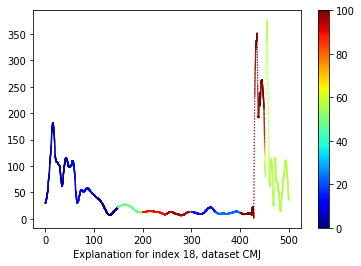

In [4]:
# Explain by Mr-SEQL (need update for other XAIs method)
# Provide an explanation method, a X/y train/test data.
# Explanation is provided for X_test 
# exp_weight is an 2d array (univariate, shape (n,:))
lime_exp = GetExplanation(X_train,y_train,X_test,y_test, explanation_type='lime')
lime_exp_weights = lime_exp.explanation_weight
print(lime_exp_weights.shape)
vis.visualize_explanation(idx=18,X_series=X_test,explanation=lime_exp_weights,ds=ds) 

In [5]:
# for i in range(10):
#     print(np.unique( lime_exp_weights[i]))

C:\Users\trang\Google Drive\github\code\utils\new\Explanation.py:30: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Explanation.py:30: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")


(179, 500)


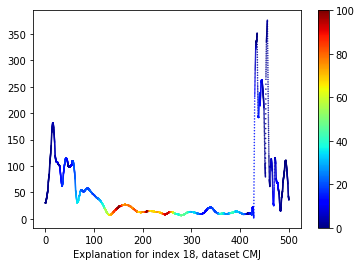

In [6]:
exp = GetExplanation(X_train,y_train,X_test,y_test, explanation_type='mrseql')
exp_weights = exp.explanation_weight
print(exp_weights.shape)
vis.visualize_explanation(idx=18,X_series=X_test,explanation=exp_weights,ds=ds)

In [7]:
exp_weights


array([[-0.00044329, -0.00019659, -0.00027407, ...,  0.00027107,
        -0.00026042, -0.00012357],
       [ 0.00321969,  0.0032988 ,  0.00364481, ..., -0.00051506,
        -0.00063426, -0.00044083],
       [ 0.00042225,  0.00037682,  0.00153889, ..., -0.00106824,
        -0.00130907, -0.00116275],
       ...,
       [ 0.00029264,  0.00030698,  0.00035602, ...,  0.00040229,
         0.00040229,  0.00046412],
       [ 0.00083932,  0.00051488,  0.00014297, ...,  0.00260453,
         0.00124285,  0.00057928],
       [-0.00236797, -0.00248182, -0.00302047, ...,  0.00244513,
         0.0023566 ,  0.00237643]])

C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


(179, 500)


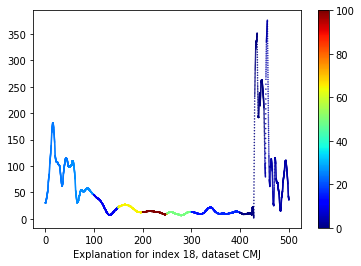

In [8]:
exp = GetExplanation(X_train,y_train,X_test,y_test, explanation_type='minirocket')
minirocket_weights = exp.explanation_weight
print(minirocket_weights.shape)
vis.visualize_explanation(idx=18,X_series=X_test,explanation=minirocket_weights,ds=ds)

In [9]:
minirocket_weights.shape

(179, 500)

### Perturb

(179, 1, 500)


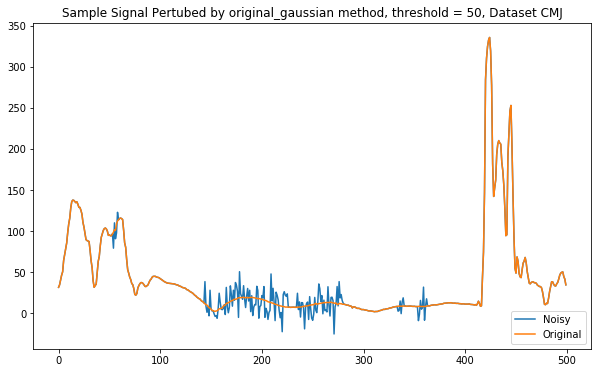

In [33]:
# Perturb based on an XAI method#
# Note that after adding noise, there will be function will return X_perturbed in 2d array
# X_test is an 2d array or an expanded 2d array in 2nd dim (n,1,:)
# weight is 2d array (n,:)
noise = Noise(X=X_test,explanation=exp_weights, noise_type='original_gaussian')

noise.add_noise(threshold=30)
X_perturbed = noise.X_perturbed_3d 
print(X_perturbed.shape)
noise.visualize(idx =10,threshold=50,dataset_name=ds)


In [ ]:
noise.add_noise(threshold=50)
noise.visualize(idx =10,threshold=50,dataset_name=ds)

(179, 1, 500)


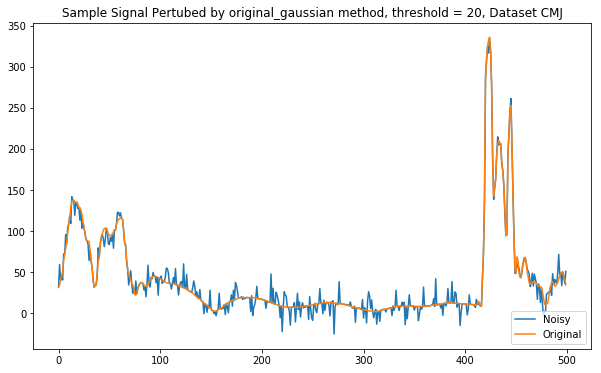

In [10]:
# Random explanation
random_weights = np.squeeze(np.random.uniform(0,100,size=X_test.shape))
# Perturb base on random exp
random_noise = Noise(X=X_test,explanation=random_weights, 
                     noise_type='original_gaussian')

random_noise.add_noise(threshold=50)
X_perturbed_random = random_noise.X_perturbed_3d
print(X_perturbed_random.shape)
random_noise.visualize(idx =10,threshold=20,dataset_name=ds)

### Re-classify

In [36]:
random_weights = np.squeeze(np.random.uniform(0,100,size=X_test.shape))
weights = [random_weights, exp_weights]
names = ['random','mrseql']

# weights = [lime_exp_weights, minirocket_weights,exp_weights]
# names = ['lime', 'minirocket','mrseql']
ref_list = ['MrSEQLClassifier','minirocket','weasel'] # resnet, weasel, rocket -- just need estimators?
# ref_list = ['weasel']

# col_names=['dataset','XAI_method', 'Referee', 'threshold','metrics: acc']
# df = pd.DataFrame(columns=col_names)

# col_names = ['dataset','XAI_method','Referee','metrics: explanation_auc']
# auc_df = pd.DataFrame(columns=col_names)

compare = CompareExplanation(X_train,y_train,X_test,y_test,explanation_list=weights,explanation_names=names,
                             referee_list = ref_list,dataset_name=ds,include_random_explanation=False,noise_type='original_gaussian')

C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.

In [37]:
compare.auc_df

,dataset,noise_type,XAI_method,Referee,metrics: explanation_auc
0,CMJ,local_mean,random,MrSEQLClassifier,0.751117
1,CMJ,local_mean,mrseql,MrSEQLClassifier,0.441620
2,CMJ,local_mean,random,minirocket,0.555866
3,CMJ,local_mean,mrseql,minirocket,0.454469
4,CMJ,local_mean,random,weasel,0.447765
5,CMJ,local_mean,mrseql,weasel,0.489106


C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


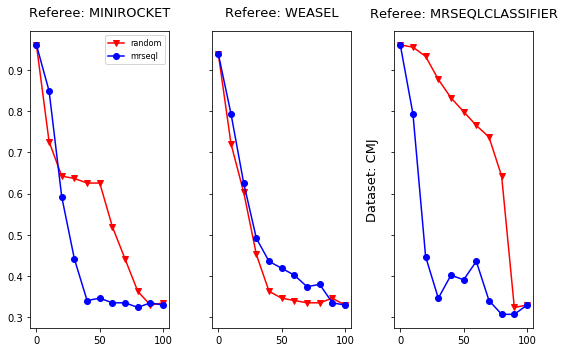

In [38]:
compare.visualize()

In [29]:
compare.auc_df

,dataset,noise_type,XAI_method,Referee,metrics: explanation_auc
0,CMJ,original_gaussian,random,MrSEQLClassifier,0.946089
1,CMJ,original_gaussian,mrseql,MrSEQLClassifier,0.948883
2,CMJ,original_gaussian,random,minirocket,0.737989
3,CMJ,original_gaussian,mrseql,minirocket,0.739944
4,CMJ,original_gaussian,random,weasel,0.627654
5,CMJ,original_gaussian,mrseql,weasel,0.718156


In [31]:
compare.auc_df

,dataset,noise_type,XAI_method,Referee,metrics: explanation_auc
0,CMJ,original_gaussian,random,MrSEQLClassifier,0.939665
1,CMJ,original_gaussian,mrseql,MrSEQLClassifier,0.944134
2,CMJ,original_gaussian,random,minirocket,0.706425
3,CMJ,original_gaussian,mrseql,minirocket,0.703073
4,CMJ,original_gaussian,random,weasel,0.584078
5,CMJ,original_gaussian,mrseql,weasel,0.690782


## Visualize

In [ ]:
vis.visualize_result(df)

In [ ]:
names.append('legend')

In [ ]:
names

zero


C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.

   dataset noise_type  XAI_method           Referee  metrics: explanation_auc
0      CMJ       zero      random  MrSEQLClassifier                  0.632682
1      CMJ       zero        lime  MrSEQLClassifier                  0.586872
2      CMJ       zero  minirocket  MrSEQLClassifier                  0.697486
3      CMJ       zero      mrseql  MrSEQLClassifier                  0.593575
4      CMJ       zero      random        minirocket                  0.622346
5      CMJ       zero        lime        minirocket                  0.593855
6      CMJ       zero  minirocket        minirocket                  0.661453
7      CMJ       zero      mrseql        minirocket                  0.583240
8      CMJ       zero      random            weasel                  0.409497
9      CMJ       zero        lime            weasel                  0.593296
10     CMJ       zero  minirocket            weasel                  0.628492
11     CMJ       zero      mrseql            weasel             

C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


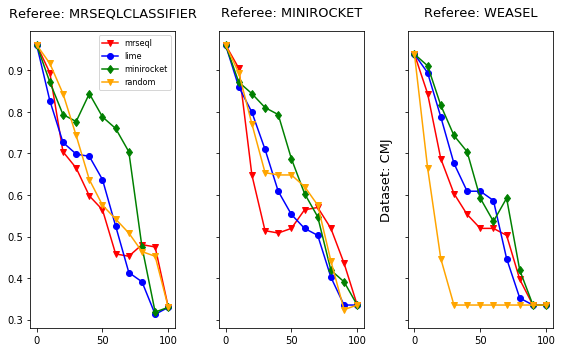

local_mean


C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.

   dataset  noise_type  XAI_method           Referee  metrics: explanation_auc
0      CMJ  local_mean      random  MrSEQLClassifier                  0.751117
1      CMJ  local_mean        lime  MrSEQLClassifier                  0.409218
2      CMJ  local_mean  minirocket  MrSEQLClassifier                  0.443296
3      CMJ  local_mean      mrseql  MrSEQLClassifier                  0.441620
4      CMJ  local_mean      random        minirocket                  0.520950
5      CMJ  local_mean        lime        minirocket                  0.434358
6      CMJ  local_mean  minirocket        minirocket                  0.430447
7      CMJ  local_mean      mrseql        minirocket                  0.448883
8      CMJ  local_mean      random            weasel                  0.447765
9      CMJ  local_mean        lime            weasel                  0.555587
10     CMJ  local_mean  minirocket            weasel                  0.555028
11     CMJ  local_mean      mrseql            weasel

C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


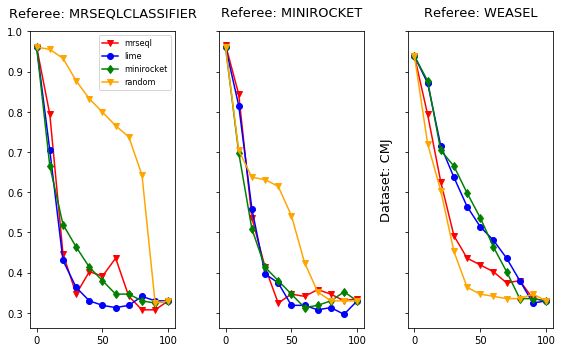

original_gaussian


C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.10.0) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class MrSEQLClassifier. (MrSEQLClassifier will be removed in v0.10.0. It will be replaced with an implementation based on Numba.) -- Deprecated since version 0.8.1.
  model = MrSEQLClassifier(seql_mode="fs")
C:\Users\trang\Google Drive\github\code\utils\new\Experiment.py:27: FutureWarning: Call to deprecated class SEQLCLF. (SEQLCLF will be removed in v0.

   dataset         noise_type  XAI_method           Referee  \
0      CMJ  original_gaussian      random  MrSEQLClassifier   
1      CMJ  original_gaussian        lime  MrSEQLClassifier   
2      CMJ  original_gaussian  minirocket  MrSEQLClassifier   
3      CMJ  original_gaussian      mrseql  MrSEQLClassifier   
4      CMJ  original_gaussian      random        minirocket   
5      CMJ  original_gaussian        lime        minirocket   
6      CMJ  original_gaussian  minirocket        minirocket   
7      CMJ  original_gaussian      mrseql        minirocket   
8      CMJ  original_gaussian      random            weasel   
9      CMJ  original_gaussian        lime            weasel   
10     CMJ  original_gaussian  minirocket            weasel   
11     CMJ  original_gaussian      mrseql            weasel   

    metrics: explanation_auc  
0                   0.939665  
1                   0.945251  
2                   0.953631  
3                   0.944134  
4                   0.686

C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\trang\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


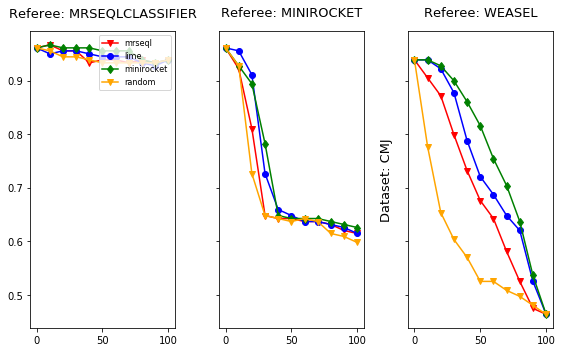

In [11]:
random_weights = np.squeeze(np.random.uniform(0,100,size=X_test.shape))
weights = [random_weights, lime_exp_weights, minirocket_weights,exp_weights]
names = ['random', 'lime', 'minirocket','mrseql']
# noise_types = ['zero','local_mean','global_mean','local_gaussian','global_gaussian','original_gaussian']
noise_types = ['zero','local_mean','original_gaussian']
ref_list = ['MrSEQLClassifier','minirocket','weasel'] # resnet, weasel, rocket -- just need estimators?

for noise_type in noise_types:
    print(noise_type)
    compare = CompareExplanation(X_train,y_train,X_test,y_test,explanation_list=weights,explanation_names=names,
                             referee_list = ref_list,dataset_name=ds,noise_type=noise_type, include_random_explanation=False)
    print(compare.auc_df)
    compare.visualize()

In [ ]:
compare.auc_d

In [ ]:
compare.auc_df